# Data Analysis and Visualization of Exported Atlas.ti report for a Systematic Literature Review

#### Importing required libraries

In [418]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

## Focus Areas and Perceived Benefits

In [419]:
# SET VALUES BEFORE EXECUTING
TITLE_INDEX = 0
YEAR_INDEX = 1
AUTHOR_INDEX = 2

In [420]:
df = pd.read_excel('latest revised report.xlsx', index_col=0)
df.head()

,● dom: additive manufacturing Gr=11,● dom: aerospace Gr=21,● dom: automotive Gr=1,● dom: biopharmaceutical Gr=1,● dom: chips Gr=1,● dom: education Gr=3,● dom: energy Gr=2,● dom: IIoT Gr=1,● dom: Industry 4.0 Gr=15,● dom: intelligent manufacturing Gr=2,...,"○ PB: transparent, interoperable, scalable data representation Gr=1",○ PB: Uncertainty Quantification Gr=1,○ PB: understanding the digital thread Gr=3,○ PB: verification and validation Gr=0,○ PB: Verification and validation of AM digital thread information Gr=1,● typ: approach / methodology Gr=16,"● typ: concept, architecture or theoretical solution Gr=16",● typ: implementation Gr=13,● typ: review / survey / evaluation Gr=13,Totals
3D PROCESS ANALYTICS FOR CARBON COMPOSITE MANUFACTURING - 2014- Kesler et al.\nGr=3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
"A closed-loop inspection architecture for additive manufacturing based on step standard - 2019 - Riaño, Rodriguez, Alvares\nGr=7",1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,9
A collaborative architecture of the industrial internet platform for manufacturing systems - 2020 - Junliag et al.\nGr=11,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,5
A digital thread approach to support manufacturing-influenced conceptual aircraft design - 2018 - Siedlak et al\nGr=5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
"A Hybrid Architecture for Secure Management of Manufacturing Data in Industry 4.0 - 2019 - Adhikari, Winslett\nGr=13",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,5


In [421]:
# Drop Totals columns
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.drop(df.tail(1).index,inplace=True)
df.shape

(58, 196)

In [422]:
# Remove Groundedness Data from Atlas
df.columns = [x.splitlines()[0] for x in df.columns]
df.index = [x.splitlines()[0] for x in df.index]
documentNosToRename = []
documents = []
flag = False
for i, x in enumerate(df.index):
    if (x.count('-')<2):
        flag = True
        documentNosToRename.append(i)
        documents.append(x)
        print(df.index[i])
        
if flag:
    print('Document(s) not matching Document - Year - Author format at position(s)', documentNosToRename, ' ', documents )

In [423]:
# Remove unwanted characters introduced by Atlas.ti
df.columns = [re.sub(r'● ', '', x) for x in df.columns]
df.columns = [re.sub(r'○ ', '', x) for x in df.columns]

In [424]:
#  checking for unexpected datatpe in Year Column
years = [x.rsplit('-',2)[YEAR_INDEX].strip() for x in df.index ]
years = [x  if x.isnumeric() else None for x in years]
if None in years:
    print('[Warning] Non-numeric data detected in column Year')
df.insert(0,'Year',years)

In [425]:
#  checking for unexpected datatpe in Author Column
authors = [x.rsplit('-',2)[2] for x in df.index ]
authors = [x if not x.isnumeric() else None for x in authors ]
if None in authors:
    print('[Warning] Numeric Data detected in column Author')
df.insert(0,'Author(s)',authors)

In [426]:
# Formatting Title Name of corpus
title = [x.rsplit('-',2)[TITLE_INDEX] for x in df.index]
df.insert(0,'Title',title)

In [427]:
# Setting new title name as index of dataframe
df.reset_index(drop=True, inplace=True )
df.set_index('Title', inplace=True)

In [428]:
domain_column_names = [x for x in df.columns if x.startswith('dom:')]
FA_column_names =  [x for x in df.columns if x.startswith('FA:')]
PB_column_names =  [x for x in df.columns if x.startswith('PB:')]
CAT_column_names =  [x for x in df.columns if x.startswith('typ:')]
LIF_column_names = [x for x in df.columns if x.startswith('lifcyc:')]

In [429]:
# replacing one-hot encoded 'domain' column with textual descriptions
p =[]
for index, row in df.iterrows():
    domain = row[domain_column_names][row[domain_column_names]==1].keys()
    domains = [x.split(':')[-1] for x in domain]
    p.append(domains)


In [430]:
# replacing one-hot encoded 'focus area' column with textual descriptions
q = []
for index, row in df.iterrows():
    focus_area = row[FA_column_names][row[FA_column_names]==1].keys()
    focus_areas = [x.split(':')[-1] for x in focus_area]
    q.append(focus_areas)

In [431]:
# replacing one-hot encoded 'perceived benefit' column with textual descriptions
r = []
for index, row in df.iterrows():
    perceived_benefit = row[PB_column_names][row[PB_column_names]==1].keys()
    perceived_benefits = [x.split(':')[-1] for x in perceived_benefit]
    r.append(perceived_benefits)

In [432]:
# replacing one-hot encoded 'category' column with textual descriptions
s = []
for index, row in df.iterrows():
    category = row[CAT_column_names][row[CAT_column_names]==1].keys()
    categories = [x.split(':')[-1] for x in category]
    s.append(categories)

In [433]:
# inserting textual descriptions and removing one-hot encoded columns
df.insert(3,'Perceived Benefit',r)
df.insert(3,'Focus Areas',q)
df.insert(3,'Domains',p)
df.insert(3,'Category',s)
df.drop(domain_column_names, axis =1, inplace=True)
df.drop(FA_column_names, axis =1, inplace=True)
df.drop(PB_column_names, axis =1, inplace=True)
df.drop(CAT_column_names, axis =1, inplace=True)
df.reset_index(inplace = True)
df = df.set_index('Title')

In [434]:
# integrating many valued texts in columns separated by commas
dom = [','.join(x).replace("'","") for x in df.Domains.values]
df.Domains = dom

foc = [','.join(x).replace("'","") for x in df['Focus Areas'].values]
df['Focus Areas'] = foc

pb = [','.join(x).replace("'","") for x in df['Perceived Benefit'].values]
df['Perceived Benefit'] = pb

cat = [','.join(x).replace("'","") for x in df['Category'].values]
df['Category'] = cat

In [435]:
# Map categories to numeric values defined in journal paper
di = {' implementation': "category IV"," concept, architecture or theoretical solution":"category II"," approach / methodology":"category III"," review / survey / evaluation":"category I"}
df['Category'] = df['Category'].map(di)
df.head()

,Author(s),Year,Category,Domains,Focus Areas,Perceived Benefit,lifcyc: a. planning,lifcyc: b. design,lifcyc: c. manufacturing,lifcyc: d. testing/quality/inspection,lifcyc: e. operations and support,lifcyc: f. end of lfe,lifcyc: z. across lifecycle
Title,,,,,,,,,,,,,
3D PROCESS ANALYTICS FOR CARBON COMPOSITE MANUFACTURING,Kesler et al.,2014,category IV,aerospace,integrate multiple data types,linking as-manufacuted and as-maintained,0,0,1,0,1,0,0
A closed-loop inspection architecture for additive manufacturing based on step standard,"Riaño, Rodriguez, Alvares",2019,category IV,"additive manufacturing, Industry 4.0","Closed Loop Feedback between inspection, manu...","imporove part quality, optmized manufacturing...",0,1,1,1,0,0,0
A collaborative architecture of the industrial internet platform for manufacturing systems,Junliag et al.,2020,category II,intelligent manufacturing,Interaction between cyber and physical manufa...,better cooperative enterprise information sys...,0,0,0,0,0,0,1
A digital thread approach to support manufacturing-influenced conceptual aircraft design,Siedlak et al,2018,category III,aerospace,"integrating design, costing and simulation tools",affordability based tradespace exploration,0,1,0,0,0,0,0
A Hybrid Architecture for Secure Management of Manufacturing Data in Industry 4.0,"Adhikari, Winslett",2019,category IV,Industry 4.0,secure manufacturing data management,realizing the digital thread,0,0,0,0,0,0,1


In [436]:
df.to_excel('last processed report.xlsx')

## Temporal Distribution of Corpus

In [437]:
temp_distribution = df['Year'].value_counts().sort_index()[:-1]
temp_distribution= temp_distribution.to_frame(name='Count')
# ax = temp_distribution.plot(y="Count")
# ax.locator_params(integer=True)

In [438]:
temp_distribution
temp_distribution = temp_distribution.reset_index().rename(columns={'index':'Year'})

In [439]:
temp_distribution

,Year,Count
0,2013,1
1,2014,3
2,2015,3
3,2016,2
4,2017,8
5,2018,19
6,2019,18


Text(0, 0.5, 'Publication Count')

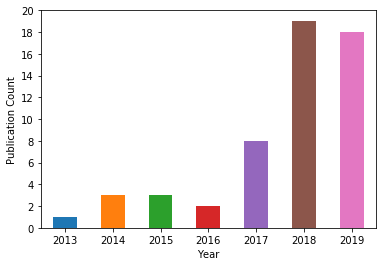

In [440]:
plot = temp_distribution.plot.bar(x='Year', y='Count', yticks = [x for x in range(21) if x%2==0], rot = 0, legend= False)
plot.set_ylabel("Publication Count")

In [441]:
plot.get_figure().savefig('temporal_distribution.pdf', format='pdf')
plot.get_figure().savefig('temporal_distribution.png', format='png')

## Plotting Domain Context with temporal distribution as an unstacked Bar Chart

In [442]:
df2 = pd.read_excel('Domain Contexts3.xlsx', index_col=0) # File exported from Atlas.ti using the Code-Document cross tabulation
df2.drop(columns= 'Totals', inplace= True)

In [443]:
# Remove Groundedness Data from Atlas and checking for expected format
df2.columns = [x.splitlines()[0] for x in df2.columns]
df2.index = [x.splitlines()[0] for x in df2.index]
documentNosToRename = []
documents = []
flag = False
for i, x in enumerate(df2.index):
    if (x.count('-')<2):
        flag = True
        documentNosToRename.append(i)
        documents.append(x)
        print(df2.index[i])
        
if flag:
    print('Document(s) not matching Document - Year - Author format at position(s)', documentNosToRename, ' ', documents )
df2.columns = [re.sub(r'●', '', x) for x in df2.columns]

Totals
Document(s) not matching Document - Year - Author format at position(s) [58]   ['Totals']


In [444]:
# removing Totals (last) row 
df2 = df2.head(-1)

In [445]:
#  checking for unexpected datatpe in Year Column
years = [x.rsplit('-',2)[YEAR_INDEX].strip() for x in df2.index ]
years = [x  if x.isnumeric() else None for x in years]
if None in years:
    print('[Warning] Non-numeric data detected in column Year')
df2.insert(0,'Year',years)

In [446]:
# formatting title
title = [x.rsplit('-',2)[TITLE_INDEX] for x in df2.index]
df2.insert(0,'Title',title)

In [447]:
df2.reset_index(drop=True, inplace=True )
df2.set_index('Title', inplace=True)

In [448]:
# formatting column names
df2.columns = [x.split(':')[-1].strip() for x in df2.columns]

In [449]:
# grouping minority columns to 'others' column
df2['others'] =   df2['automotive'] + df2['biopharmaceutical'] + df2['chips'] + df2['education'] +df2['energy']+df2['IIoT'] + df2['intelligent manufacturing'] + df2['Model-Based Engineering'] + df2['model-based enterprise'] + df2['product lifecycle management'] + df2['robot programming'] + df2['scalable distributed manufacturing systems'] + df2['smart manufacturing'] + df2['Systems Engineering']
df2.drop(['automotive','biopharmaceutical','chips','energy','education','IIoT','intelligent manufacturing', 'Model-Based Engineering','model-based enterprise','product lifecycle management','robot programming','scalable distributed manufacturing systems','smart manufacturing','Systems Engineering'], axis =1, inplace = True)
df2.head()

,Year,additive manufacturing,aerospace,Industry 4.0,others
Title,,,,,
3D PROCESS ANALYTICS FOR CARBON COMPOSITE MANUFACTURING,2014,0,1,0,0
A closed-loop inspection architecture for additive manufacturing based on step standard,2019,1,0,1,0
A collaborative architecture of the industrial internet platform for manufacturing systems,2020,0,0,0,1
A digital thread approach to support manufacturing-influenced conceptual aircraft design,2018,0,1,0,0
A Hybrid Architecture for Secure Management of Manufacturing Data in Industry 4.0,2019,0,0,1,0


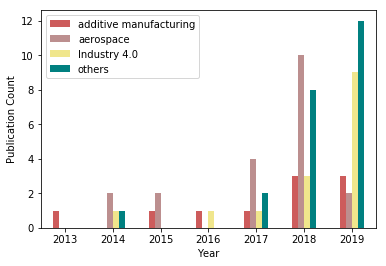

In [450]:
# preparing and plotting the data
unstacked_dataset = df2.groupby(['Year']).sum()[:-1]
chart_colors = np.array(["indianred","rosybrown", "khaki", "teal"])
ax = unstacked_dataset.plot(kind = 'bar', colors= chart_colors)
ax.set_ylabel("Publication Count")
ax.tick_params(labelrotation=0)

In [451]:
# saving the figure
ax.figure.savefig('unstacked_dataset.pdf')
ax.figure.savefig('unstacked_dataset.png')
plt.close()

### Type of Publication

In [452]:
df1 = pd.read_excel('dataset-type of contribution.xlsx', sheet_name='CodeDocumentTable' )
df1

,Type Of Publication
approach / methodology,16
concept or theoretical solution,16
implementation\n,13
review / survey / evaluation\n,13
Totals,58


In [453]:
# preparing data for plotting
df1 = df1.head(-1)
df1.reset_index(inplace=True, drop = True)
s = pd.Series(['category III','category II','category IV','category I'])
s.name  ='type of contribution'
df1.insert(column = 'type of contribution', value = s, loc = 0)
df1.set_index('type of contribution', inplace=True)
df1 = df1.reindex(['category I','category II','category III','category IV'])

[None, None, None, None, None, None, None, None]

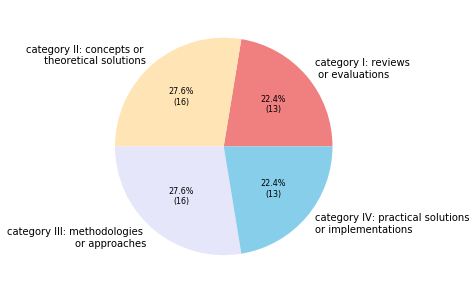

In [454]:
# plotting data 
fig, ax = plt.subplots(figsize=(7, 5), subplot_kw=dict(aspect="equal"))

values = df1['Type Of Publication'].to_dict()

labels = ["category I: reviews \n or evaluations", "category II: concepts or \n theoretical solutions", "category III: methodologies \nor approaches", "category IV: practical solutions\nor implementations"]
publication_count = df1['Type Of Publication'].tolist()

type_of_publication = df1.index.tolist()

pie_colors = np.array(["lightcoral","moccasin", "lavender", "skyblue"])

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values.values())
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct


wedges, texts, autotexts = ax.pie(publication_count, autopct=make_autopct(values), colors=pie_colors,
                                  textprops=dict(color="black"), labels = labels)

plt.setp(autotexts, size=8)

In [455]:
# saving the figure
ax.figure.savefig('Type of Contribution.pdf')
ax.figure.savefig('Type of Contribution.png')
plt.show()

## Lifecycle Focus Areas

In [456]:
# making a separate dataframe containing only lifecycle information
df3 = df[LIF_column_names]
df3.head()

,lifcyc: a. planning,lifcyc: b. design,lifcyc: c. manufacturing,lifcyc: d. testing/quality/inspection,lifcyc: e. operations and support,lifcyc: f. end of lfe,lifcyc: z. across lifecycle
Title,,,,,,,
3D PROCESS ANALYTICS FOR CARBON COMPOSITE MANUFACTURING,0,0,1,0,1,0,0
A closed-loop inspection architecture for additive manufacturing based on step standard,0,1,1,1,0,0,0
A collaborative architecture of the industrial internet platform for manufacturing systems,0,0,0,0,0,0,1
A digital thread approach to support manufacturing-influenced conceptual aircraft design,0,1,0,0,0,0,0
A Hybrid Architecture for Secure Management of Manufacturing Data in Industry 4.0,0,0,0,0,0,0,1


In [457]:
# thresholding all values to 1
df3 = df3.ge(1).astype(int)

In [458]:
df3.loc['Column_Total']= df3.sum(numeric_only=True, axis=0)
df3.to_excel('Lifecycle report.xlsx')

In [459]:
# making a mask for those rows have True for across lifecycle
mask = df3['lifcyc: z. across lifecycle']==1

In [460]:
# using mask to set that row all columns to 1
df3.loc[mask, LIF_column_names] = 1

In [461]:
df3.loc['Column_Total']= df3.sum(numeric_only=True, axis=0)
ex = df3.loc['Column_Total']

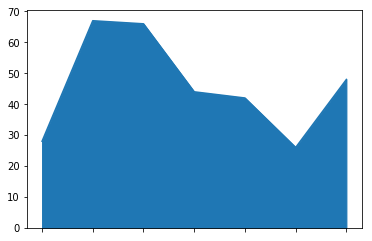

In [462]:
ex.plot.area()